# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib
import numpy as np
import seaborn as sns
# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [17]:
chipo = pd.read_csv('file.tsv', delimiter='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [19]:
chipo['item_price']= chipo['item_price'].map(lambda x :x.lstrip('$'))

In [54]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))


### Step 4. See the first 10 entries

In [55]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,0.39
1,1,1,Izze,[Clementine],0.39
2,1,1,Nantucket Nectar,[Apple],0.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,0.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",6.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",0.98
6,3,1,Side of Chips,NaN,0.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",1.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",0.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",0.25


### Step 5. Create a histogram of the top 5 items bought

In [56]:
top = chipo['item_name'].value_counts().head(5)

In [57]:
top

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: item_name, dtype: int64

[0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.2]
[301.     306.3125 311.625  316.9375 322.25   327.5625 332.875  338.1875
 343.5    348.8125 354.125  359.4375 364.75   370.0625 375.375  380.6875
 386.     391.3125 396.625  401.9375 407.25   412.5625 417.875  423.1875
 428.5    433.8125 439.125  444.4375 449.75   455.0625 460.375  465.6875
 471.     476.3125 481.625  486.9375 492.25   497.5625 502.875  508.1875
 513.5    518.8125 524.125  529.4375 534.75   540.0625 545.375  550.6875
 556.     561.3125 566.625  571.9375 577.25   582.5625 587.875  593.1875
 598.5    603.8125 609.125  614.4375 619.75   625.0625 630.375  635.6875
 641.     646.3125 651.625  656.9375 662.25   667.5625 672.875  678.1875
 683.5    688.8125 69

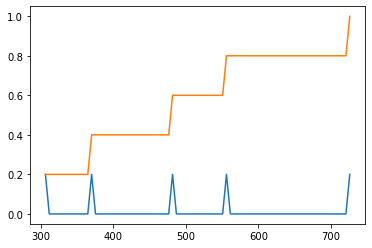

In [58]:
counts,bins_edges = np.histogram(top,bins=80,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bins_edges)
cdf = np.cumsum(pdf)
plt.plot(bins_edges[1:],pdf)
plt.plot(bins_edges[1:],cdf)
plt.show()



### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0.0, 36.7)

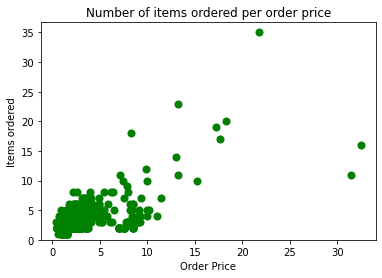

In [60]:
noof = chipo.groupby(['order_id']).sum()
plt.scatter(x = noof['item_price'], y = noof['quantity'], s = 50, c = 'green')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [62]:
#draw a bar to top 5 bought items?


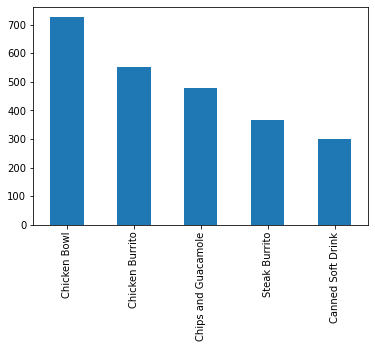

In [65]:
top = chipo['item_name'].value_counts().head(5).plot(kind='bar')